In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.dpi'] = 80

In [38]:
df = pd.read_csv("/Users/lysi2/Documents/UNI_Imperial/Big_Data/CW/results/trial_data/sample1/my_data.csv", header=None)
df = df.rename(columns={0:'datetime', 1:'damp', 2:'haz', 3:'timestamp'})

In [39]:

df['timestamp'] -= 1464649000
df.head()

,datetime,damp,haz,timestamp
0,2016-05-31 00:00:00,0.2,0.0,200
1,2016-05-31 00:05:00,0.2,0.0,500
2,2016-05-31 00:10:00,0.2,0.0,800
3,2016-05-31 00:15:00,0.2,0.0,1100
4,2016-05-31 00:20:00,0.2,0.0,1400


In [40]:
lst = ['05-31', '06-01', '06-02', '06-03', '06-04', '06-05', '06-06', '06-07', '06-08', '06-09', '06-10', '06-11', '06-12', '06-13']

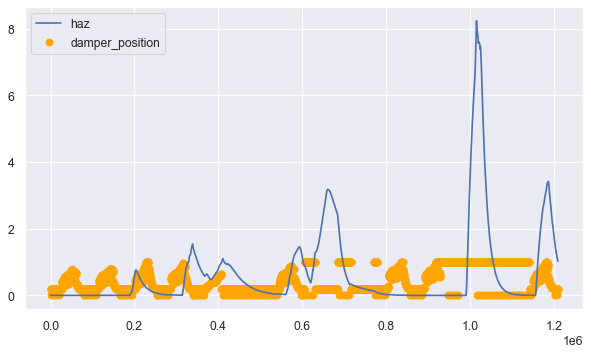

In [14]:
plt.plot(df['timestamp'], df['haz'], label = 'haz')
plt.scatter(df['timestamp'], df['damp'], label = 'damper_position', c = 'orange')
plt.legend()
plt.show()

/Users/lysi2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


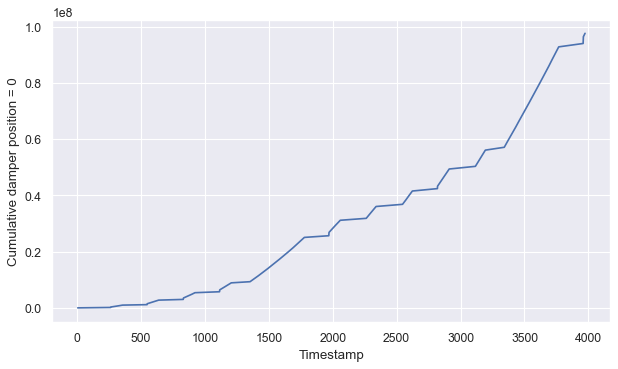

In [34]:
# pd.set_option('display.max_rows', 700)
# df[df['timestamp'] >=1e6]
df_zeros = df[df['damp'] ==0]
df_zeros['cum_timestamp'] = df_zeros['timestamp'].cumsum()
# df_zeros
# plt.plot(df_zeros['timestamp'], df_zeros['haz'])
plt.plot(df_zeros['cum_timestamp'])
plt.xlabel('Timestamp')
plt.ylabel('Cumulative damper position = 0')
plt.savefig('cum.pdf')
plt.show()

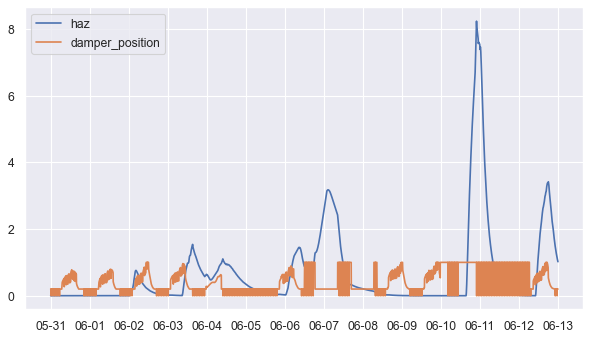

In [41]:
fig, ax = plt.subplots()

ax.plot(df['timestamp'], df['haz'], label = 'haz')
ax.plot(df['timestamp'], df['damp'], label = 'damper_position')
ax.set_xticks(ticks= np.linspace(df['timestamp'].values[0], df['timestamp'].values[-1], 14))
ax.set_xticklabels(lst)
plt.legend()
plt.show()

In [20]:
df_new = pd.concat([df['timestamp'], df['haz'], df['damp'], df['haz'].shift(-210)], axis=1, keys=['timestamp', 'haz', 'damp', 'shifted_haz']).dropna()
df_new.head()

,timestamp,haz,damp,shifted_haz
0,200,0.0,0.2,0.0
1,500,0.0,0.2,0.0
2,800,0.0,0.2,0.0
3,1100,0.0,0.2,0.0
4,1400,0.0,0.2,0.0


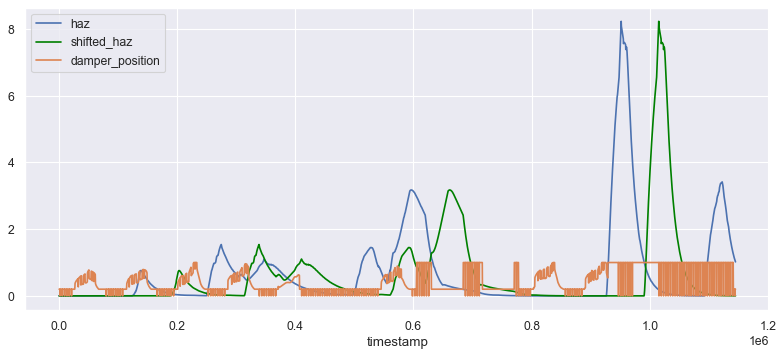

In [27]:
plt.plot(df_new['timestamp'], df_new['shifted_haz'], label = 'haz')
plt.plot(df_new['timestamp'], df_new['haz'], label = 'shifted_haz', color = 'green')
plt.plot(df_new['timestamp'], df_new['damp'], label = 'damper_position')
plt.legend()
plt.xlabel('timestamp')
plt.savefig('shifted_haz.pdf')
plt.show()

In [10]:
pd.concat([df_new['damp'], df_new['haz']], axis=1).corr()

,damp,haz
damp,1.000000,0.190195
haz,0.190195,1.000000


In [11]:
pd.concat([df_new['damp'], df_new['shifted_haz']], axis=1).corr()

,damp,shifted_haz
damp,1.000000,0.285637
shifted_haz,0.285637,1.000000


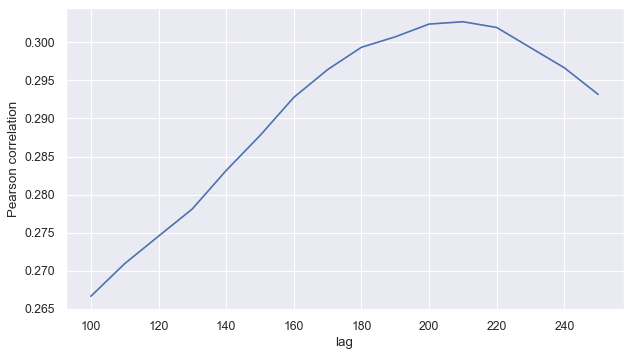

In [35]:
shift = np.arange(100, 260, 10)
lst = np.array([0.26661869844530883, 0.2709075522082924, 0.27451899115016276, 0.2781068554746894, 0.28315302692523525, 0.2877515355894161, 0.29277531373589594, 0.29642891641589064, 0.29936321202845884, 0.300740064897844, 0.3024166142781724, 0.30272683424746455, 0.3019709148899516, 0.29931759781199707, 0.2966697222308417, 0.29317569242504754])

plt.plot(shift, lst)
plt.xlabel('lag')
plt.ylabel('Pearson correlation')
plt.savefig('pearcorr.pdf')
plt.show()

In [42]:
nums = [115 ,
114 ,
116 ,
115,
0 ,
2   ,
116 ,
116 ,
116 ,
117 ,
115 ,
3   ,
2   ,
115]

In [43]:
dts = ['2016-05-31', 
'2016-06-01', 
'2016-06-02', 
'2016-06-03', 
'2016-06-04', 
'2016-06-05', 
'2016-06-06', 
'2016-06-07', 
'2016-06-08', 
'2016-06-09', 
'2016-06-10', 
'2016-06-11', 
'2016-06-12', 
'2016-06-13']

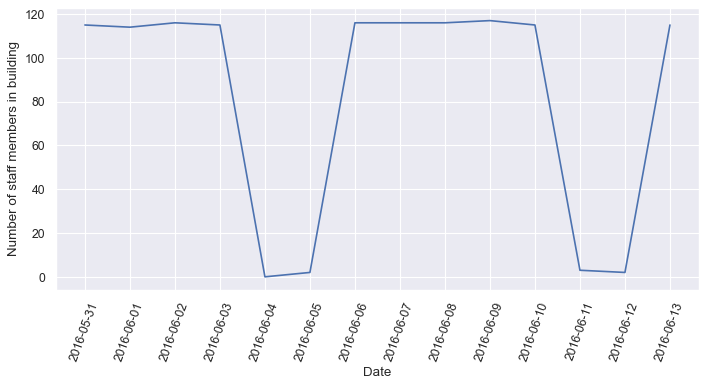

In [53]:
sns.lineplot(x = np.arange(len(nums)), y= nums)
plt.xticks(np.arange(len(nums)), labels= dts, rotation=70)
plt.xlabel('Date')
plt.ylabel('Number of staff members in building')
plt.tight_layout()
plt.savefig('q1plot.pdf')
plt.show()